In [1]:
import os
import rrtmg as FLUXES
import numpy as np

In [2]:
## Profiles
z = np.loadtxt("/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/retrieval/trace_gases/z.csv", delimiter=",")
co2 = np.loadtxt("/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/retrieval/trace_gases/co2.csv", delimiter=",")
o3 = np.loadtxt("/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/retrieval/trace_gases/o3.csv", delimiter=",")
ch4 = np.loadtxt("/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/retrieval/trace_gases/ch4.csv", delimiter=",")
n2o = np.loadtxt("/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/retrieval/trace_gases/n2o.csv", delimiter=",")

In [3]:
import netCDF4 as nc
with nc.Dataset("/home/philipp/ozone.nc", "r") as f:
    o3 = f.variables['o3'][:]
    z_era5 = f.variables['z'][:]/9.80665*1e-3
    lat = np.argmin(np.abs(np.array(f.variables['latitude'][:])-81.95))
    lon = np.argmin(np.abs(np.array(f.variables['longitude'][:])-10.33))
print(lat, lon)

12 81


In [4]:
import scipy.interpolate
o3_f = scipy.interpolate.interp1d(np.array(z_era5[0,:,12,81]), np.array(o3[0,:,12,81]), fill_value="extrapolate")
o3 = o3_f(np.array(z))

In [5]:
o3

array([1.50331316e-08, 1.48546813e-08, 1.46847285e-08, 1.44722876e-08,
       1.42598467e-08, 1.40474059e-08, 1.38349650e-08, 1.36225241e-08,
       1.35800359e-08, 1.36330443e-08, 1.65466633e-08, 1.94602823e-08,
       2.23739013e-08, 3.69419963e-08, 5.15100913e-08, 5.73373293e-08,
       7.19054243e-08, 7.50226894e-08, 7.89712375e-08, 8.13403664e-08,
       8.17220283e-08, 8.17604282e-08, 8.18065082e-08, 8.25502069e-08,
       8.37538766e-08, 8.57322934e-08, 8.79473406e-08, 8.90635058e-08,
       8.89272266e-08, 8.79789800e-08, 8.69303568e-08, 8.68897517e-08,
       8.72658883e-08, 8.76497175e-08, 9.10108799e-08, 9.78669211e-08,
       1.02281495e-07, 1.06696070e-07, 1.10969413e-07, 1.12769660e-07,
       1.15470030e-07, 1.18689596e-07, 1.22418377e-07, 1.26397435e-07,
       1.31912645e-07, 1.37427855e-07, 1.43606820e-07, 1.50250504e-07,
       1.56894187e-07, 1.62106486e-07, 1.66974538e-07, 1.71842589e-07,
       1.95659367e-07, 2.23657104e-07, 2.73704593e-07, 3.96924905e-07,
      

In [6]:
n2o = 0.31*np.ones(n2o.size)

In [7]:
path_retrievals = "/home/philipp/Doktorandenzeit/DATA_PHD/RRTMG/INPUT/INPUT_FOR_RRTMG/RRTMG_input_nomod"
ssp_ice = "/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/ssp_database/ssp_db.Droxtal.gamma.0p100"
files = sorted(os.listdir(path_retrievals))

In [8]:
model = FLUXES.RRTMG(os.getcwd() + "/rrtmg_lw_v5.00_linux_pgi", os.getcwd() + "/rrtmg_sw_v5.00_linux_pgi", \
                  ["/home/philipp/Doktorandenzeit/SOFTWARE_PHD/Total_Cloud_Water_retrieval/ssp_database/ssp_db.mie_wat.gamma_sigma_0p100", ssp_ice])

in_CNET_20170603_144315_81.950554_10.335514_62.74221266113166.nc


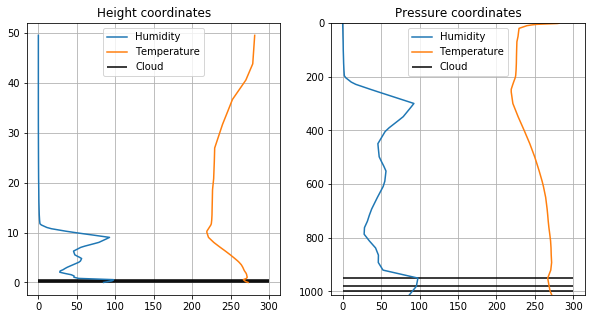

In [9]:
epsilon = 0.99*np.ones(16)
epsilon[np.array([5,6,7])] = 0.98
spec = files[4700]
print(spec)
model.read_cloudnet(os.path.join(path_retrievals, spec))
model.get_cparam(), model.get_position()
model.plot_atmosphere()

In [10]:
o3_ppmv = 28.9644 / 47.9982 * 1e6 * o3
tg = model.read_trace_gases(z, co2, n2o, ch4, o3_ppmv)
#model.plot_atmosphere()

In [11]:
epsilon = 0.99*np.ones(16)
epsilon[np.array([5,6,7])] = 0.98
in_cld_rrtm = model.create_inputfile_cloud()
input_rrtm = model.create_inputfile_atm_terrestrial(cloud=0, semiss=epsilon, atm="HAAA4A4")
model.run_RRTMG_terrestrial(clouds=False)
input_rrtm = model.create_inputfile_atm_terrestrial(cloud=2, semiss=epsilon, atm="HAAA4A4")
model.run_RRTMG_terrestrial(clouds=True)
#input_rrtm = model.create_inputfile_atm_solar(cloud=0)
#model.run_RRTMG_solar(clouds=False)
#input_rrtm = model.create_inputfile_atm_solar(cloud=2)
#model.run_RRTMG_solar(clouds=True)

In [12]:
fluxes_all = model.get_fluxes_terrestrial(17)['all']['DOWNWARD FLUX']-\
    model.get_fluxes_terrestrial(17)['clear']['DOWNWARD FLUX'] - \
    model.get_fluxes_terrestrial(17)['all']['UPWARD FLUX'] + \
    model.get_fluxes_terrestrial(17)['clear']['UPWARD FLUX']

In [13]:
fluxes_all.iloc[-1]

75.71659999999997